In [ ]:
#!pip install beautifulsoup4

# Scraping IMDB Data using Python BeautifulSoup



### Outline:

- Introduction about web scraping
- Introduction about IMDB and the purpose of it
- We're using (Python, requests, Beautiful Soup, Pandas)

### About web scraping
Web scraping consists in gathering data available on websites. This can be done manually by a human user or by a bot. The latter can of course gather data much faster than a human user and that is why we are going to focus on this. Is it therefore technically possible to collect all the data of a website in a matter of minutes this kind of bot. The legality of this practice is not well defined however. Websites usually describe in their terms of use and in their robots.txt file if they allow scrapers or not.

### Introduction to IMDB Website

IMDB (an acronym for Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online - including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews.

Here are steps we'll follow:

- We're going to scrape https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=000&ref_=adv_nxt 
- We'll get a list of movies.For each movie,we'll get movie title, Movie genre, Movie  duration, Movie rating, movie year,Movie certification,Movie url
- we'll create a csv file in the followig format:


## Scrape the list of titles from IMDb



- use requests to download the page
- use BS4 to parse and extract information
- convert to a Pandas dataframe

Let's write a function to download the page.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
def get_topics_page(url):
    
    response=requests.get(url)
    # check successfull response
    if response.status_code != 200:
        raise Exception(f'Failed to load page {topic_url}')
    # Parse using BeautifulSoup
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [3]:
topic_url = 'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start=000&ref_=adv_next'
doc = get_topics_page(topic_url)

In [4]:
doc


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb "Top 1000"
(Sorted by IMDb Rating Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?groups=top_1000" rel="canonical"/>
<meta content="http://www.imdb.com/search/title/?groups=top_1000" property=

doc contains code like below

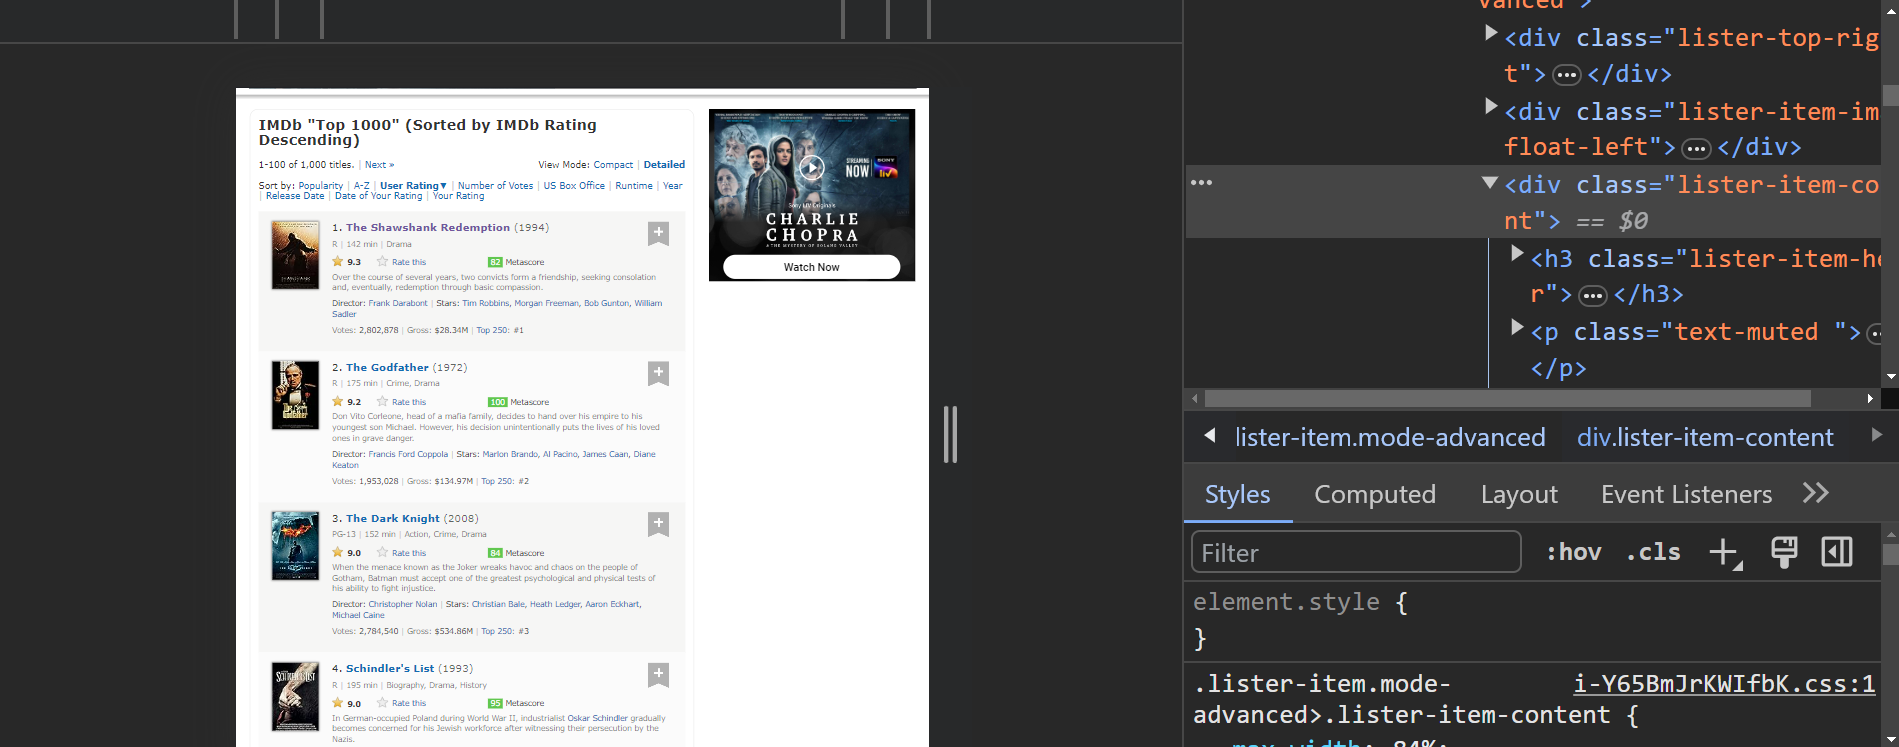

In [6]:
title = doc.find('h1', class_='header').text
title

'IMDb "Top 1000"\n(Sorted by IMDb Rating Descending) '

In [ ]:
#doc.find('title')

Let's create some helper functions to parse information from the page

In [9]:
select_movie = doc.find('h3', class_='lister-item-header').find('a').text
select_movie

'The Shawshank Redemption'

### To get title of movie

In [10]:
def get_movie_titles(doc):
    
    selection_class="lister-item-header"
    movie_title_tags=doc.find_all('h3',{'class':selection_class})
    movie_titles=[]

    for tag in movie_title_tags:
        title = tag.find('a').text
        movie_titles.append(title)
        
        
    return movie_titles

In [11]:
titles = get_movie_titles(doc)

In [12]:
titles[:5]

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 "Schindler's List",
 '12 Angry Men']

Similarly we defined functions for movie url, ratings, certification, duration and  year

### To get URL's of movie

In [13]:
def get_movie_url(doc):
    url_selector="lister-item-header"           
    movie_url_tags=doc.find_all('h3',{'class':url_selector})
    movie_url_tagss=[]
    base_url = 'https://www.imdb.com/'
    for tag in movie_url_tags:
        movie_url_tagss.append('https://www.imdb.com' + tag.find('a')['href'])
    return movie_url_tagss

In [14]:
urls = get_movie_url(doc)

In [15]:
urls[:5]

['https://www.imdb.com/title/tt0111161/',
 'https://www.imdb.com/title/tt0068646/',
 'https://www.imdb.com/title/tt0468569/',
 'https://www.imdb.com/title/tt0108052/',
 'https://www.imdb.com/title/tt0050083/']

In [16]:
Runtime = doc.find('span',class_='runtime').text.replace(" min",'')
Runtime

'142'

### To get movie duration

In [17]:
def get_movie_duration(doc):
    
    selection_class="runtime"
    movie_duration_tags=doc.find_all('span',{'class':selection_class})
    movie_duration=[]

    for tag in movie_duration_tags:
        duration = tag.text[:-4]
        movie_duration.append(duration)
        
        
    return movie_duration

In [18]:
durations = get_movie_duration(doc)

In [19]:
durations[:5]

['142', '175', '152', '195', '96']

In [20]:
Cert = doc.find('span', class_ = "certificate").text
Cert

'A'

### To get certification of movie

In [22]:
def get_movie_certification(doc):
    
    selection_class="lister-item-content"
    movie_details_tags = doc.find_all('div',{'class':selection_class})
    movie_certification=[]
    

    for detail_tag in movie_details_tags:
        
        certification_tag = detail_tag.find('span',{'class':'certificate'})
        if certification_tag:
            movie_certification.append(certification_tag.text)
        else:
            movie_certification.append('NA')                                                           
        
    return movie_certification

In [23]:
certifications = get_movie_certification(doc)

In [24]:
certifications[:5]

['A', 'A', 'UA', 'A', 'U']

In [25]:
Year = doc.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(','').replace(')','')
Year

'1994'

### To get year of movie

In [26]:
def get_movie_year(doc):
    year_selector = "lister-item-year text-muted unbold"           
    movie_year_tags=doc.find_all('span',{'class':year_selector})
    movie_year_tagss=[]
    for tag in movie_year_tags:
        movie_year_tagss.append(tag.get_text().strip()[1:5])
    return movie_year_tagss

In [27]:
years = get_movie_year(doc)

In [28]:
years[:5]

['1994', '1972', '2008', '1993', '1957']

### To get genre of movie

In [29]:
def get_movie_genre(doc):
    genre_selector="genre"            
    movie_genre_tags=doc.find_all('span',{'class':genre_selector})
    movie_genre_tagss=[]
    for tag in movie_genre_tags:
        movie_genre_tagss.append(tag.get_text().strip())
    return movie_genre_tagss

In [30]:
genres = get_movie_genre(doc)

In [31]:
genres[:5]

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Biography, Drama, History',
 'Crime, Drama']

### To get ratings of movie

In [32]:
def get_movie_rating(doc):
    rating_selector="inline-block ratings-imdb-rating"            
    movie_rating_tags=doc.find_all('div',{'class':rating_selector})
    movie_rating_tagss=[]
    for tag in movie_rating_tags:
        movie_rating_tagss.append(tag.get_text().strip())
    return movie_rating_tagss

In [33]:
ratings = get_movie_rating(doc)

In [34]:
ratings[:5]

['9.3', '9.2', '9.0', '9.0', '9.0']

Let's put all together into a single function

In [35]:
import pandas as pd

In [36]:
def all_pages(num=10):
# Let's we create a dictionary to store data of all movies
    movies_dict={
        'titles':[],
        'genre':[],
        'duration':[],
        'rating':[],
        'year':[],
        'certification':[],
        'url':[]
    }
  # We have to scrap more than one page so we want urls of all pages with the help of loop we can get all urls
    for i in range(1,num*110,100):
       
        url = 'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start='+str(i)+'&ref_=adv_next'
        doc = get_topics_page(url)
   
        
        movies_dict['titles'] += get_movie_titles(doc)
        movies_dict['url'] += get_movie_url(doc)
        movies_dict['certification'] += get_movie_certification(doc)
        movies_dict['rating'] += get_movie_rating(doc)
        movies_dict['duration'] += get_movie_duration(doc)
        movies_dict['year'] += get_movie_year(doc)
        movies_dict['genre'] += get_movie_genre(doc)   
        
    return pd.DataFrame(movies_dict)


In [37]:
movies = all_pages()

In [38]:
movies.to_csv('movies.csv',index=None)

movies csv file has been created, which contains the data that we've scrapped

In [39]:
dataframe = pd.read_csv('movies.csv')

In [40]:
dataframe

,titles,genre,duration,rating,year,certification,url
0,The Shawshank Redemption,Drama,142,9.3,1994,A,https://www.imdb.com/title/tt0111161/
1,The Godfather,"Crime, Drama",175,9.2,1972,A,https://www.imdb.com/title/tt0068646/
2,The Dark Knight,"Action, Crime, Drama",152,9.0,2008,UA,https://www.imdb.com/title/tt0468569/
3,Schindler's List,"Biography, Drama, History",195,9.0,1993,A,https://www.imdb.com/title/tt0108052/
4,12 Angry Men,"Crime, Drama",96,9.0,1957,U,https://www.imdb.com/title/tt0050083/
...,...,...,...,...,...,...,...
995,Philomena,"Biography, Comedy, Drama",98,7.6,2013,PG-13,https://www.imdb.com/title/tt2431286/
996,Control,"Biography, Drama, Music",122,7.6,2007,R,https://www.imdb.com/title/tt0421082/
997,Un long dimanche de fiançailles,"Drama, Mystery, Romance",133,7.6,2004,U,https://www.imdb.com/title/tt0344510/
998,Shine,"Biography, Drama, Music",105,7.6,1996,Not Rated,https://www.imdb.com/title/tt0117631/


### Summary

We scrapped the specific data, which we want using Python programming language, requests and BeautifulSoup library  have been used to download the pages and then exploring and getting the relevant data from the website. Further the work has been in a csv file to be used for further processing.We've created a dataframe which consists of 1000 rows and 7 columns fom 10 pages.

## References

1. https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-and-rest-apis
2. https://www.crummy.com/software/BeautifulSoup/bs4/doc/
3. https://docs.python-requests.org/en/master/